# Overview

In this notebook I would like to explore educational and work profile characteristics of women developers in Germany. To this end I will retrieve data from the Stackoverflow developer survey 2020. The questions that I am interested to understand is 

* what is their field of study
* what is their highest level of formal education
* how much satisfied are they with their job
* what are the factors that they consider important to pick a job
* whether and how often they work overime.  

In all these questions we will try to understand whether there are significanlty different trends with comparison to men developers from Germany.

# Data understanding

Next we are going to import the dataframe obtained from the Stackoverflow developers survey with the answers and 
the questions

In [2]:
import pandas as pd
from collections import defaultdict
from functions import *

%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None) # added because I would like all the rows to be displayed by head

df = pd.read_csv('./survey_results_public.csv')
df.head(20)

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,EUR,Microsoft SQL Server,Elasticsearch;Microsoft SQL Server;Oracle,"Developer, desktop or enterprise applications;...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",White or of European descent,Man,"Languages, frameworks, and other technologies ...",Slightly satisfied,I am not interested in new job opportunities,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,.NET Core;Xamarin,.NET;.NET Core,Microsoft Teams;Microsoft Azure;Trello,Confluence;Jira;Slack;Microsoft Azure;Trello,No,Somewhat important,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,Often: 1-2 days per week or more,Start a free trial;Ask developers I know/work ...,Amused,Stack Overflow (public Q&A for anyone who codes),Visit Stack Overflow;Go for a walk or other ph...,Windows,2 to 9 employees,Android;iOS;Kubernetes;Microsoft Azure;Windows,Windows,NaN,Straight / Heterosexual,No,"No, not at all",NaN,Multiple times per day,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,GBP,NaN,NaN,"Developer, full-stack;Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,NaN,NaN,NaN,Very dissatisfied,I am not interested in new job opportunities,Python;Swift,JavaScript;Swift,React Native;TensorFlow;Unity 3D,React Native,Github;Slack,Confluence;Jira;Github;Gitlab;Slack,NaN,NaN,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,NaN,NaN,Amused,Stack Overflow (public Q&A for anyone who code...,Visit Stack Overflow;Go for a walk or other ph...,MacOS,"1,000 to 4,999 employees",iOS;Kubernetes;Linux;MacOS,iOS,I have little or no influence,NaN,Yes,"Yes, definitely",Less than once per month or monthly,Multiple times per day,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Once a decade,NaN,NaN,No,NaN,NaN,NaN,Stack Overflow (public Q&A for anyone who codes),NaN,Linux-based,NaN,NaN,NaN,NaN,NaN,Yes,"Yes, somewhat",A few times per month or weekly,Daily or almost daily,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,ALL,NaN,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,White or of European descent,Man,Flex time or a flexible schedule;Office enviro...,Slightly dissatisfied,"I’m not actively looking, but I am open to new...",NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,Not at all important/not necessary,Curious about other opportunities;Wanting to w...,NaN,Once a year,Not sure,Yes,Yes,Occasionally: 1-2 days per quarter but less th...,NaN,NaN,Stack Overflow (public Q&A for anyone who code...,NaN,Lin

Let's have a look at the questions of the Stackoverflow developer's survey 2020.

In [3]:
df2 = pd.read_csv('./survey_results_schema.csv')
df2.head(61)

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,Age,What is your age (in years)? If you prefer not...
4,Age1stCode,At what age did you write your first line of c...
5,CompFreq,"Is that compensation weekly, monthly, or yearly?"
6,CompTotal,What is your current total compensation (salar...
7,ConvertedComp,Salary converted to annual USD salaries using ...
8,Country,Where do you live?
9,CurrencyDesc,Which currency do you use day-to-day? If your ...


We are interested in extracting data for women or men developers, who live in Germany and work as developers by profession or write code sometimes as part of their job. Let us see which questions of the survey will help us restrict to data from those developers.

In [4]:
list(df2[df2.Column == 'Country']['QuestionText'])

['Where do you live?']

In [5]:
list(df2[df2.Column == 'Gender']['QuestionText'])

['Which of the following describe you, if any? Please check all that apply. If you prefer not to answer, you may leave this question blank.']

In [6]:
df['Gender'].unique()

array(['Man', nan, 'Woman',
       'Man;Non-binary, genderqueer, or gender non-conforming',
       'Non-binary, genderqueer, or gender non-conforming',
       'Woman;Non-binary, genderqueer, or gender non-conforming',
       'Woman;Man;Non-binary, genderqueer, or gender non-conforming',
       'Woman;Man'], dtype=object)

In [7]:
list(df2[df2.Column == 'MainBranch']['QuestionText'])

['Which of the following options best describes you today? Here, by "developer" we mean "someone who writes code."']

In [8]:
df['MainBranch'].unique()

array(['I am a developer by profession', 'I code primarily as a hobby',
       'I used to be a developer by profession, but no longer am',
       'I am not primarily a developer, but I write code sometimes as part of my work',
       'I am a student who is learning to code', nan], dtype=object)

Next, let's create a new dataframe df3 which would contain the survey results only from Germany, including people that define themselves as Man or Woman and declare either that are "I am a developer by profession" or "I am not primarily a developer, but I write code sometimes as part of my work"

In [9]:
df3 = df[(df['Country']=='Germany') & ((df['Gender']=='Man') | (df['Gender']=='Woman')) & 
            ((df['MainBranch']=='I am a developer by profession')|
             (df['MainBranch']=='I am not primarily a developer, but I write code sometimes as part of my work'))] 

In [10]:
df3.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,EUR,Microsoft SQL Server,Elasticsearch;Microsoft SQL Server;Oracle,"Developer, desktop or enterprise applications;...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",White or of European descent,Man,"Languages, frameworks, and other technologies ...",Slightly satisfied,I am not interested in new job opportunities,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,.NET Core;Xamarin,.NET;.NET Core,Microsoft Teams;Microsoft Azure;Trello,Confluence;Jira;Slack;Microsoft Azure;Trello,No,Somewhat important,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,Often: 1-2 days per week or more,Start a free trial;Ask developers I know/work ...,Amused,Stack Overflow (public Q&A for anyone who codes),Visit Stack Overflow;Go for a walk or other ph...,Windows,2 to 9 employees,Android;iOS;Kubernetes;Microsoft Azure;Windows,Windows,NaN,Straight / Heterosexual,No,"No, not at all",NaN,Multiple times per day,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
5,6,I am a developer by profession,No,NaN,14,NaN,NaN,NaN,Germany,European Euro,EUR,NaN,NaN,"Designer;Developer, front-end;Developer, mobile","Secondary school (e.g. American high school, G...",Employed full-time,White or of European descent,Man,Diversity of the company or organization;Langu...,Slightly satisfied,I am not interested in new job opportunities,HTML/CSS;Java;JavaScript,HTML/CSS;Java;JavaScript,NaN,NaN,Github;Slack,Confluence;Github;Slack;Trello,Not sure,NaN,Fairly important,NaN,NaN,Once a year,No,No,No,Never,Ask developers I know/work with;Read ratings o...,Amused,Stack Overflow (public Q&A for anyone who code...,Play games;Visit Stack Overflow;Watch help / t...,Windows,NaN,Android,Android;Docker;WordPress,I have some influence,Straight / Heterosexual,Yes,"Yes, somewhat",A few times per month or weekly,A few times per week,Neither easy nor difficult,Appropriate in length,NaN,NaN,React.js,NaN,NaN,NaN,6,4
22,23,I am a developer by profession,Yes,27.0,14,NaN,NaN,NaN,Germany,European Euro,EUR,NaN,NaN,"Developer, back-end;Developer, desktop or ente...","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,White or of European descent,Man,"Flex time or a flexible schedule;Languages, fr...",Very satisfied,I am not interested in new job opportunities,C#;C++,Bash/Shell/PowerShell;C#;C++,.NET Core,.NET,Confluence;Jira;Github,Confluence;Jira;Github,No,Neutral,Fairly important,Curious about other opportunities;Better compe...,Company reviews from third party sites (e.g. G...,Every few months,No,Onboarding? What onboarding?,No,Rarely: 1-2 days per year or less,Start a free trial;Ask developers I know/work ...,"Hello, old friend",Stack Overflow (public Q&A for anyone who code...,Play games;Call a coworker or friend;Visit Sta...,Windows,100 to 499 employees,Arduino;Linux;Raspberry Pi,Arduino;Raspberry Pi;Windows,I have a great deal of influence,Straight / Heterosexual,Yes,"Yes, somewhat",Less than once per month or monthly,Daily or

Let us check the length of the new dataframe df_new:

In [11]:
len(df3)

2763

the number and the percentage of Women in the new dataframe:

In [12]:
len(df3[df3['Gender']=='Woman'])

158

In [13]:
percentage_women= len(df3[df3['Gender']=='Woman'])/len(df3)*100
print(round(percentage_women,1))

5.7


While the number and the percentage of Men in the new dataframe are respectively

In [14]:
len(df3[df3['Gender']=='Man'])

2605

In [15]:
percentage_men= len(df3[df3['Gender']=='Man'])/len(df3)*100
print(round(percentage_men,1))

94.3


Let's now look at the five questions of the survey that we would like to further analyze:

In [16]:
list(df2[df2.Column == 'UndergradMajor']['QuestionText'])

['What was your primary field of study?']

In [17]:
list(df2[df2.Column == 'EdLevel']['QuestionText'])

['Which of the following best describes the highest level of formal education that you’ve completed?']

In [18]:
list(df2[df2.Column == 'JobSat']['QuestionText'])

['How satisfied are you with your current job? (If you work multiple jobs, answer for the one you spend the most hours on.)']

In [19]:
list(df2[df2.Column == 'JobFactors']['QuestionText'])

['Imagine that you are deciding between two job offers with the same compensation, benefits, and location. Of the following factors, which 3 are MOST important to you?']

In [20]:
list(df2[df2.Column == 'NEWOvertime']['QuestionText'])

['How often do you work overtime or beyond the formal time expectation of your job?']

# Data preparation

Now we have identified which questions are of interest to us, so we will subset the dataframe to include only the columns with the corresponding questions.

In [21]:
column_list = ['UndergradMajor', 'EdLevel', 'JobSat', 'JobFactors', 'NEWOvertime','Gender','MainBranch']

In [22]:
df_new = df3[column_list]
df_new.head()

,UndergradMajor,EdLevel,JobSat,JobFactors,NEWOvertime,Gender,MainBranch
0,"Computer science, computer engineering, or sof...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Slightly satisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Man,I am a developer by profession
5,NaN,"Secondary school (e.g. American high school, G...",Slightly satisfied,Diversity of the company or organization;Langu...,Never,Man,I am a developer by profession
22,"Another engineering discipline (such as civil,...","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Very satisfied,"Flex time or a flexible schedule;Languages, fr...",Rarely: 1-2 days per year or less,Man,I am a developer by profession
23,"Another engineering discipline (such as civil,...","Professional degree (JD, MD, etc.)",Very satisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Man,I am a developer by profession
33,"Computer science, computer engineering, or sof...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,"Flex time or a flexible schedule;Languages, fr...",NaN,Man,I am a developer by profession


Next, we are going to check for missing values:

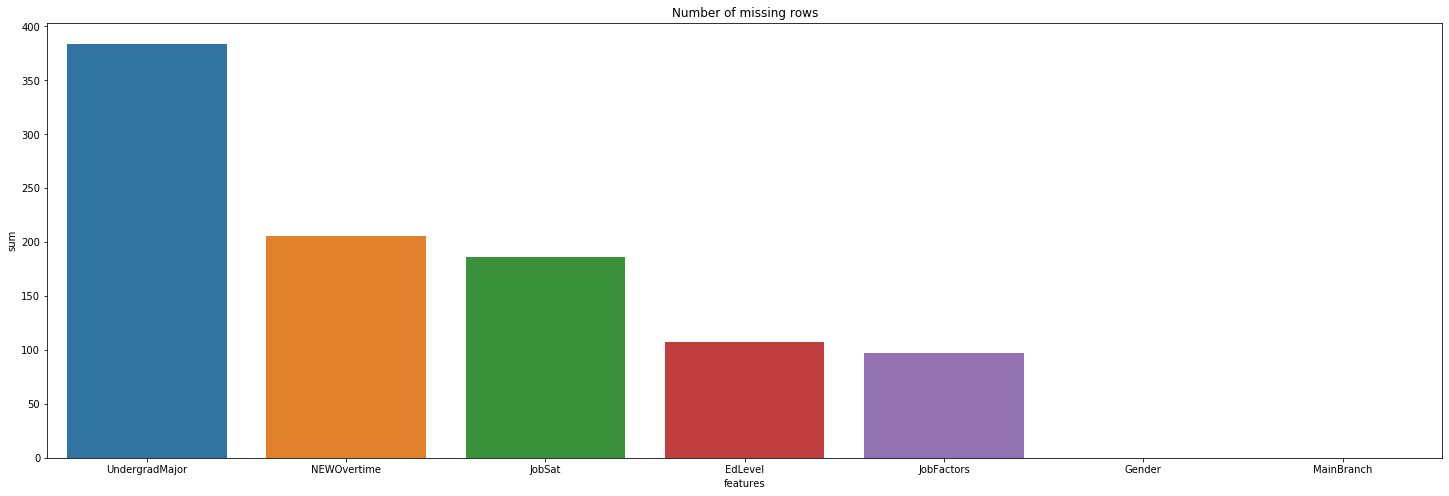

In [23]:
plt.figure(figsize=(25,8))
plt.title('Number of missing rows')
missing_count = pd.DataFrame(df_new.isnull().sum(), columns=['sum']).sort_values(by=['sum'],ascending=False).head(20).reset_index()
missing_count.columns = ['features','sum']
sns.barplot(x='features',y='sum', data = missing_count)
plt.show()

We will not use the data to perform any modelling so for each categorical variables the only thing that we will do
is count with what frequency its one of the entries appears. Thus we will continue our analysis ignoring missing 
entires. For the chi_sqared test that we are going to perform the missing entires will not matter because we just measure the frequency of its appearing entry of a categorical variable.

# Data analysis

##  Which is your primary field of study?

First we retrieve separately the answers from women and men in our dataset df_new and find the percentage that declared each field of study.

In [24]:
df_field_of_study = create_percentage(df_new, 'UndergradMajor', 'Field of study', True)
df_field_of_study.head(21)

,Field of study,Gender,value
0,"Computer science, computer engineering, or sof...",Men,57.120921
1,"A natural science (such as biology, chemistry,...",Men,5.719770
2,"Information systems, information technology, o...",Men,5.220729
3,"Another engineering discipline (such as civil,...",Men,7.178503
4,"A humanities discipline (such as literature, h...",Men,0.882917
5,Mathematics or statistics,Men,4.107486
6,"A business discipline (such as accounting, fin...",Men,1.727447
7,"A social science (such as anthropology, psycho...",Men,1.036468
8,Fine arts or performing arts (such as graphic ...,Men,0.690979
9,I never declared a major,Men,0.767754


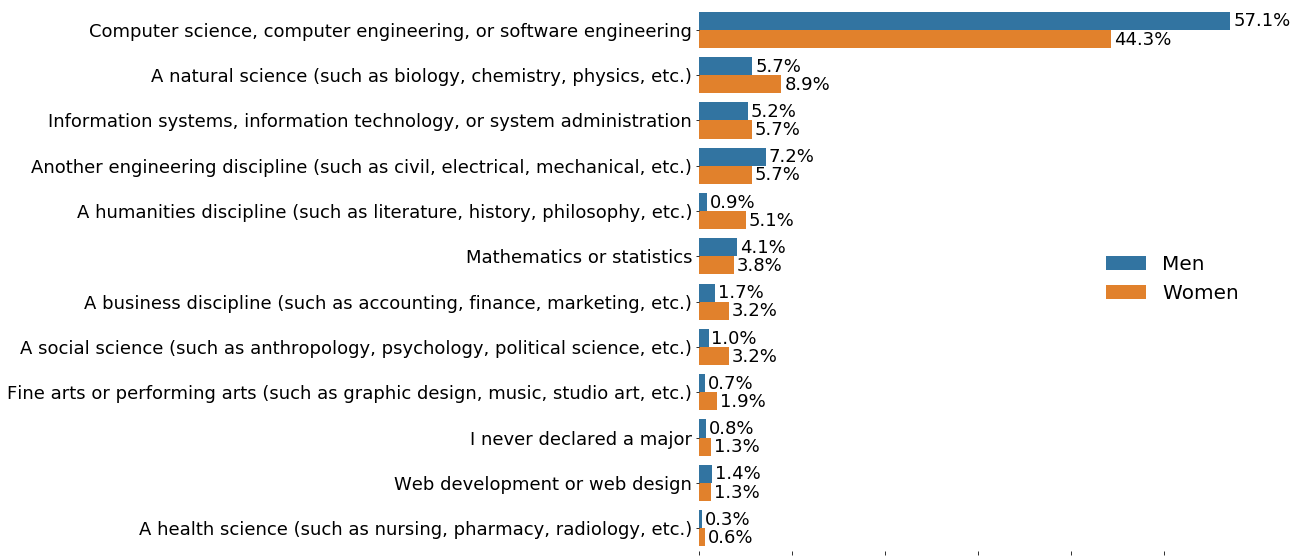

pandas.core.frame.DataFrame

In [27]:
plot("Field of study", df_field_of_study)

We see that although for both women and men the most popular degree to work in a developer's role is "Comuter science, computer engineering or software engineering" the percentage of men with such a degree is much higher than the corresponding one for women. On the other hand a larger portion of women with a degree in "A natural science" work as developers. Quite striking is also the fact that a high percentage of women with a degree in "a humanities discipline" work as developers, maybe related to the fact that overall more women than men have such a degree. As the size of our sample that includes men is much larger than the corresponding one for women, it might be that these percentages are misleading, so we will perform a chi-squared test to conclude if there is significance difference between the frequencies of observations between women and men.

In [22]:
list_field = ['Computer science, computer engineering, or software engineering',
              'A natural science (such as biology, chemistry, physics, etc.)',
              'Another engineering discipline (such as civil, electrical, mechanical, etc.)', 
             'A humanities discipline (such as literature, history, philosophy, etc.)']



table_field_of_study = create_frequency(df_new, 'UndergradMajor',list_field)
print(table_field_of_study)

[[70, 14, 9, 8], [1488, 149, 187, 23]]


In [23]:
pvalue = chi_squared_test(table_field_of_study)

The p value is: 4.489736196986341e-07, i.e. smaller than the level of signficance p=0.05, thus the null hypothesis is rejected. 


The rejection of the null hypothesis suggests that between the class of men and women there is real difference in the frequency that the fields of study "Computer Science,..","A natural science..","Another engineering discipline" or a "A humanities discipline.." appear. 

## 'Which of the following best describes the highest level of formal education that you’ve completed?'

Next we are going to check the educational level of women and men developers in Germany, according to how they have answered the question 'Which of the following best describes the highest level of formal education that you’ve completed?'.

In [26]:
df_education_level = create_percentage(df_new, 'EdLevel', 'Education Level', True)

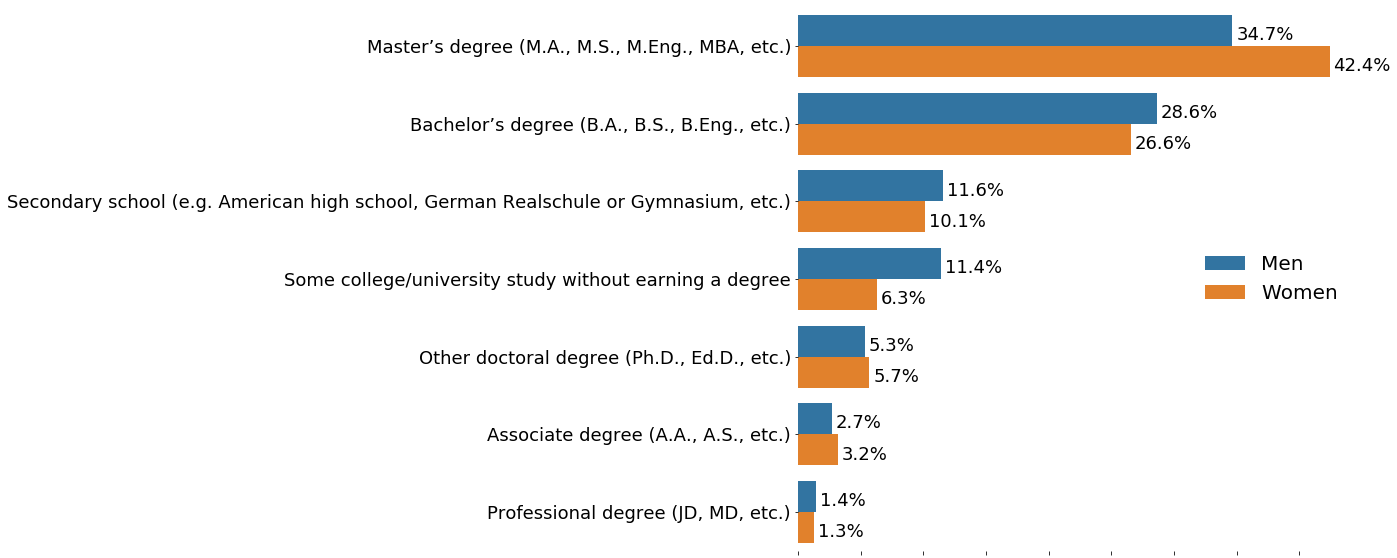

In [27]:
plot("Education Level", df_education_level)

In [28]:
list_education = ['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)','Other doctoral degree (Ph.D., Ed.D., etc.)',
                  'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
                  'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
                  'Associate degree (A.A., A.S., etc.)',
                  'Some college/university study without earning a degree']

In [1]:
table_ed_level_1 = create_frequency(df_new, 'EdLevel',list_education)

NameError: name 'create_frequency' is not defined

We would like to check if there is a significant difference between the women and men developers who own a 'Master's' or a 'PhD' degree with respect to the ones with highest educational level the 'Bachelor', 'Secondary school', 'Some college/university without earning a degree' or 'Associate degree'. The null hypothesis is that the frequency in the these two categoriest (that correspond to women and een) are not significantly different for women and men. 

In [49]:
table_ed_level = [[0]*2]*2
for i in range(2):
    table_ed_level[i][0] = table_ed_level_1[i][0] + table_ed_level_1[i][1]
    table_ed_level[i][1] = table_ed_level_1[i][2] + table_ed_level_1[i][3] + \
                           table_ed_level_1[i][4] + table_ed_level_1[i][5]

In [32]:
pvalue = chi_squared_test(table_ed_level)

The p value is: 1.0, i.e. larger than the level of signficance p=0.05, thus the null hypothesis is accepted.


## 'How satisfied are you with your current job? 

Now we would like to look into detail on how developers answered how satisfied they are with their current job.
To this end we retrieve the corresponding percentges from the available answers, depicted in the next figure.

In [33]:
df_job_satisfaction = create_percentage(df_new, 'JobSat', 'Job Satisfaction', True)

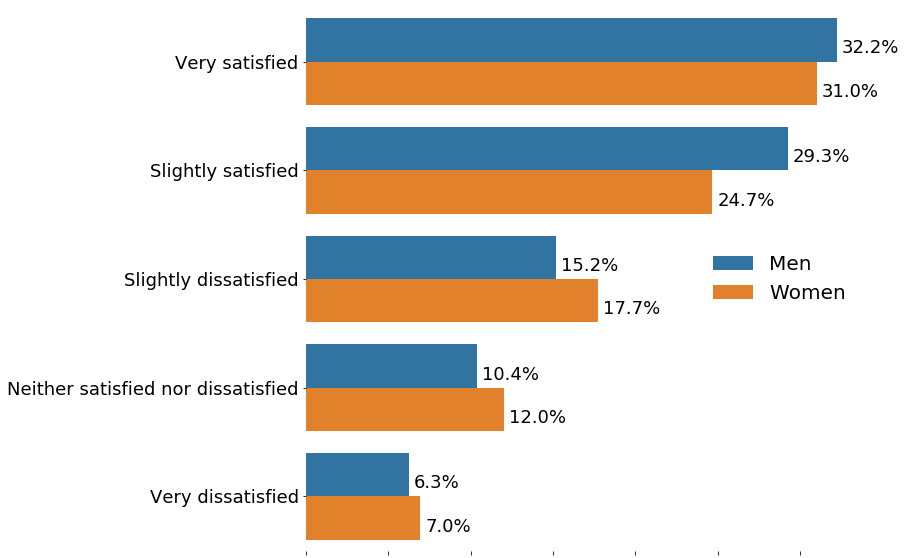

In [34]:
plot("Job Satisfaction", df_job_satisfaction)

In [35]:
list_satisfaction = ['Very satisfied', 'Slightly satisfied', 'Slightly dissatisfied','Very dissatisfied']
table_satisfaction = create_frequency(df_new, 'JobSat', list_satisfaction)
print(table_satisfaction)

[[49, 39, 28, 11], [840, 762, 395, 163]]


We will make two groups one of the 'Satisfied' ones which will include the 'Very satisfied', 'Slightly satisfied'
and one of the 'Dissatisfied' ones which will include the 'Slightly dissatisfied' and 'Very dissatisfied'.

In [36]:
table_job_sat = [[0]*2]*2
for i in range(2):
    table_job_sat[i][0] = table_satisfaction[i][0] + table_satisfaction[i][1]
    table_job_sat[i][1] = table_satisfaction[i][2] + table_satisfaction[i][3] 
print(table_job_sat)

[[1602, 558], [1602, 558]]


In [37]:
table_job_sat = [[88, 39, 19],[1602, 558, 271]]

In [38]:
pvalue = chi_squared_test(table_job_sat)

The p value is: 0.3808698115707978, i.e. larger than the level of signficance p=0.05, thus the null hypothesis is accepted.


We have grouped the answers to Satisfied and not Satisfied and the result was that although from the percentages it
looks like men developers are more satisfied than women, this hypothesis cannot be verified. 

## 'Imagine that you are deciding between two job offers with the same compensation, benefits, and location. Of the following factors, which 3 are MOST important to you?'

As each developer could give 3 answers to this question, which appear seperated with a ; symbol in the dataframe
we had to split accordingly the dataset, so that in its row appears one occurance of the following factors. The new column we have named 'method'. 

In [39]:
df_fac =df_new['JobFactors'].str.split(';')
df_fac_long = df_new.assign(method=df_fac).explode('method')
df_fac_long.head()
df_job_factors = create_percentage(df_fac_long, 'method', 'Job Factors', True)

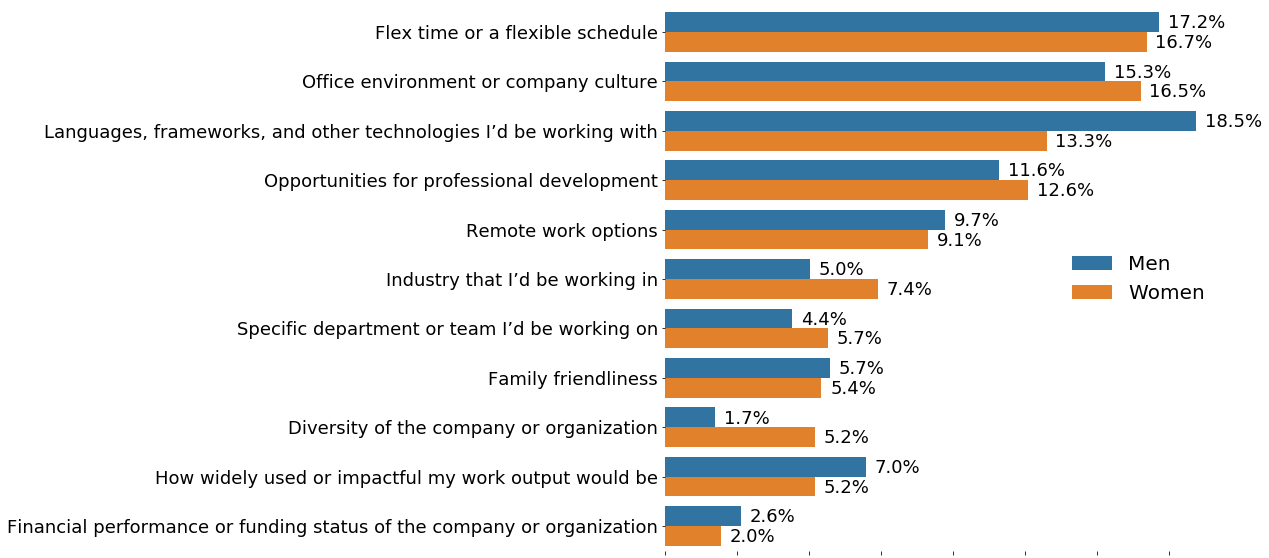

In [40]:
plot("Job Factors", df_job_factors)

We would like to focus on only the 3 top factors (which appear first in the figure above) and see if there is a difference in the frequency that women and men decide for one of those. For men for example the 'Languages, frameworks' seem to be the number one reason while for women the 'Flex time ..'. The null hypothesis (HO) states that there the two samples (women, men) are the same, so we move to build the contingency matrix so as to see if this hypothesis can be rejected or accepted depending on the p value.

In [41]:
list_jobfactors= ['Languages, frameworks, and other technologies I’d be working with', 
                  'Flex time or a flexible schedule','Office environment or company culture']

In [42]:
table_job_factors = create_frequency(df_fac_long, 'method', list_jobfactors)

In [43]:
pvalue = chi_squared_test(table_job_factors)

The p value is: 0.05698090649879791, i.e. larger than the level of signficance p=0.05, thus the null hypothesis is accepted.


We have found that the null hypothesis holds, so there is no significant difference in the frequency that men and women decide for the order of the three top factors to choose a job. However, as we see the p value is really close to 0.05, the level of significance that we have set, so we cannot also safely claim that the frequency of top job factors for men and women are the same.

## 'How often do you work overtime or beyond the formal time expectation of your job?'

Last we are going to investigate whether there is a difference between women and men with respect to how often they 
work overtime. First let's have a look at the corresponding percentages.

In [44]:
df_overtime = create_percentage(df_new, 'NEWOvertime', 'Overtime', True)

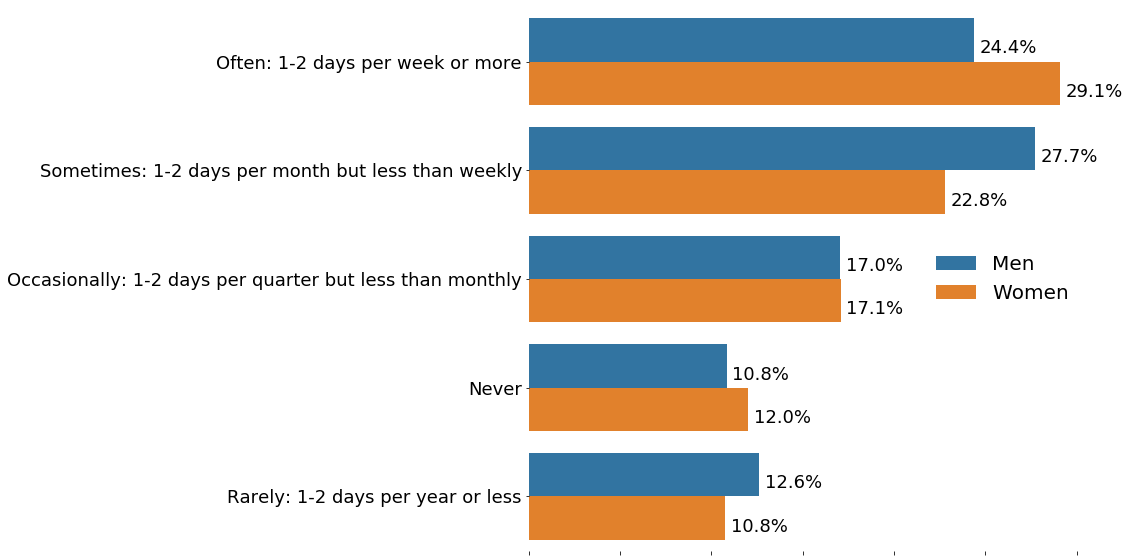

In [45]:
plot("Overtime", df_overtime)

Next we build a contingency matrix which includes all the categories that appear in the figure to check whether there is signifant difference in how often women and men work overtime. The null hypothesis is that the two samples are the same.

In [46]:
list_overtime = ['Often: 1-2 days per week or more', 'Never',
       'Rarely: 1-2 days per year or less', 
       'Sometimes: 1-2 days per month but less than weekly',
       'Occasionally: 1-2 days per quarter but less than monthly']

In [47]:
table_overtime = create_frequency(df_new, 'NEWOvertime',list_overtime)

print(table_overtime)

[[46, 19, 17, 36, 27], [635, 282, 329, 722, 444]]


In [48]:
pvalue = chi_squared_test(table_overtime)

The p value is: 0.5081144913114763, i.e. larger than the level of signficance p=0.05, thus the null hypothesis is accepted.


We could not reject the null hypothesis which suggests that the trend of overtime working in women and men is not significanlty different.

# Conclusions

After this analysis we can now answer the questions that we had set in the beginning of the notebook.

* Although for both men and women developers the most popular field of study is 'Computer engineering', for women 
   the corresponding percentage is lower than for men.Moroever, a larger part of women developers have a degree in 'Natural Sciences'. Interesting is the fact that around 5 % of women developers have studied humanities, a degree that is not connected to a developer's work.
* Women developers have a higher level of formal education than men, as it is suggested from the percentage of women that own a Master's or a PhD degree.
* More than half of the developers are satisfied with their job. For men the corresponding percentage from the survey data is around 6 % higher. However a chi-squared test revealed that there is no significant difference in the level of satisfaction between the two genders.
* The top 3 factors that women developers decide for a job, from the ones listed in the survey, are the same as the 3 ones for men. However, these factors appear with different popularity for the 2 genders. In a chi-squared test that we have performed we got a p-value close to the thresshold p-value that we have set. Thus we could not safely conclude whether there is correlation between job factors and gender.
* Women developers work overtime around 29 % while the corresponding percentage for men lies around 5 % lower. However, by a performing a chi-squared analysis we could not identify a signifcant difference in the overtime trends for the two genders.